# Iniciando analise de dados da tabela insurance

objetivo de criar um modelo que encontre o motivo do plano de saúde ser mais caro com base nesses dados.

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore")


In [26]:
raw_data = pd.read_csv("insurance.csv")

dataset = raw_data.copy()

## Para melhor analise dos dados vamos transformar os tipos de categoria de texto para numérico

In [27]:
label_encoder = LabelEncoder()
one_hot_encoder = OneHotEncoder()

# Variaveis binarias (Sim ou nao)
dataset['smoker'] =  label_encoder.fit_transform(dataset['smoker'])
dataset['sex'] =  label_encoder.fit_transform(dataset['sex'])

# Variavel com multiplas opcoes
region_encoded = one_hot_encoder.fit_transform(dataset[['region']]).toarray()
region_encoded_df = pd.DataFrame(region_encoded, columns=one_hot_encoder.get_feature_names_out(['region']))

dataset = pd.concat([dataset, region_encoded_df], axis=1)
dataset.drop('region', axis=1, inplace=True)

# Analise exploratoria de dados

## Verificando dados do dataset

In [28]:
raw_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Analisando as descrições estatiticas do dataset, para encontrar alguma tendência

In [29]:
raw_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Novo dataset agora com os dados transformados

In [30]:
dataset

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0.0,0.0,0.0,1.0
1,18,1,33.770,1,0,1725.55230,0.0,0.0,1.0,0.0
2,28,1,33.000,3,0,4449.46200,0.0,0.0,1.0,0.0
3,33,1,22.705,0,0,21984.47061,0.0,1.0,0.0,0.0
4,32,1,28.880,0,0,3866.85520,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,0.0,1.0,0.0,0.0
1334,18,0,31.920,0,0,2205.98080,1.0,0.0,0.0,0.0
1335,18,0,36.850,0,0,1629.83350,0.0,0.0,1.0,0.0
1336,21,0,25.800,0,0,2007.94500,0.0,0.0,0.0,1.0


In [31]:
# Set seaborn style
import seaborn as sns
sns.set(style="whitegrid")

## Como está a distribuição de idade do dataset?

## Como está a distribuição de Charges do dataset?

## Como está a distribuição de BMI do dataset?

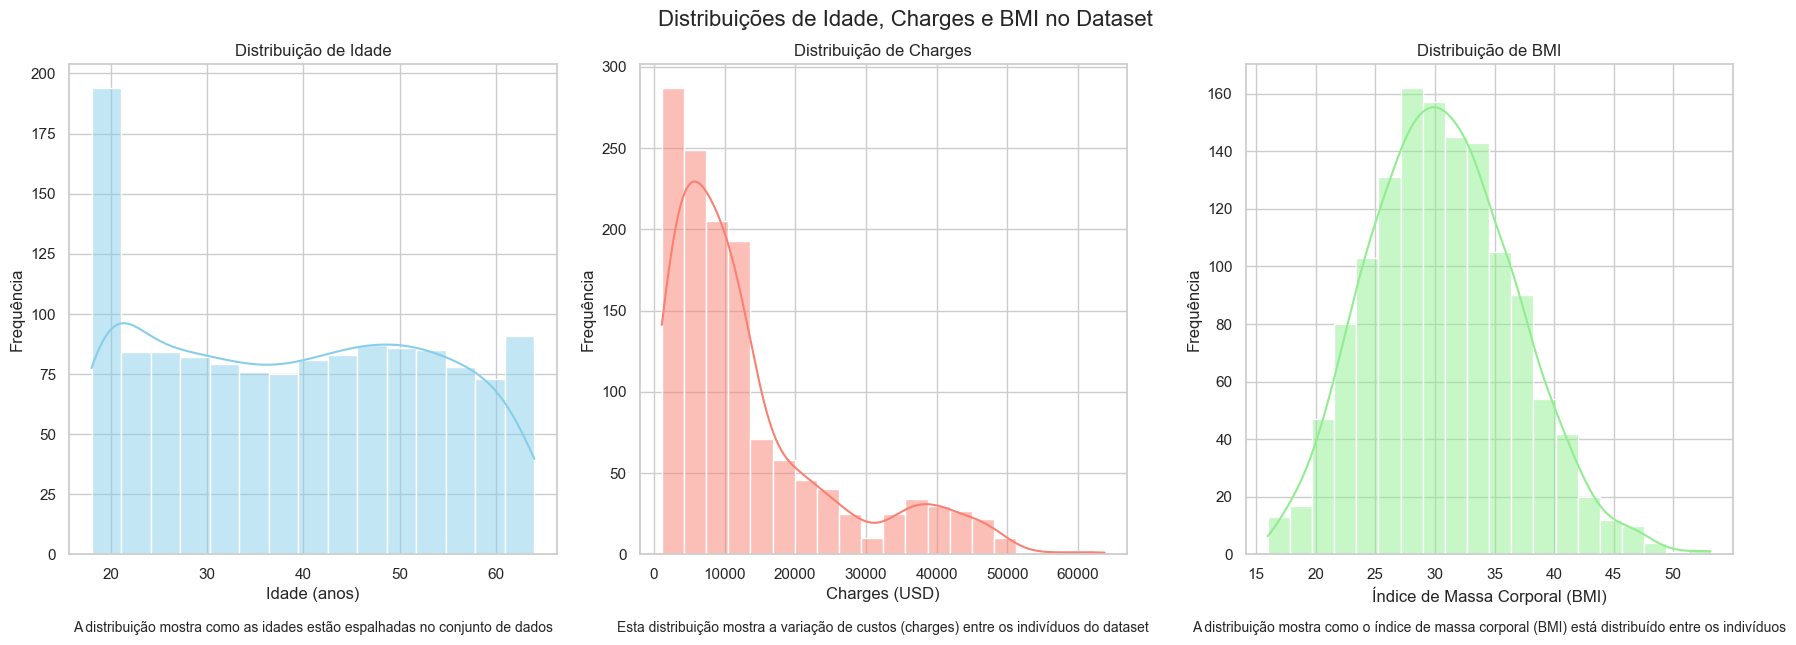

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set seaborn style
sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 3, figsize=(18, 6), constrained_layout=True)

# Como está a distribuição de idade do dataset?
sns.histplot(dataset['age'], bins=15, kde=True, color="skyblue", ax=axes[0])
axes[0].set_title("Distribuição de Idade")
axes[0].set_xlabel("Idade (anos)")
axes[0].set_ylabel("Frequência")
axes[0].text(0.5, -0.15, 'A distribuição mostra como as idades estão espalhadas no conjunto de dados',
             transform=axes[0].transAxes, ha='center', va='center', fontsize=10)

# Como está a distribuição de Charges do dataset?
sns.histplot(dataset['charges'], bins=20, kde=True, color="salmon", ax=axes[1])
axes[1].set_title("Distribuição de Charges")
axes[1].set_xlabel("Charges (USD)")
axes[1].set_ylabel("Frequência")
axes[1].text(0.5, -0.15, 'Esta distribuição mostra a variação de custos (charges) entre os indivíduos do dataset',
             transform=axes[1].transAxes, ha='center', va='center', fontsize=10)

# Como está a distribuição de BMI do dataset?
sns.histplot(dataset['bmi'], bins=20, kde=True, color="lightgreen", ax=axes[2])
axes[2].set_title("Distribuição de BMI")
axes[2].set_xlabel("Índice de Massa Corporal (BMI)")
axes[2].set_ylabel("Frequência")
axes[2].text(0.5, -0.15, 'A distribuição mostra como o índice de massa corporal (BMI) está distribuído entre os indivíduos',
             transform=axes[2].transAxes, ha='center', va='center', fontsize=10)

plt.suptitle("Distribuições de Idade, Charges e BMI no Dataset", fontsize=16, y=1.05)
plt.show()


## Conclusoes

### Idade: Distribuicao equilibrada, com um volume muito mais alto apenas na faixa de 18-20 anos, sendo praticamente 2x mais do que qualquer outra faixa
### Custos: Variavel target. Concentraa a maioria dos custos de 2000 - 25000. Extende-se ate 65000+ em cada vez menos casos. (Por que?)
### IMC: Distribuicao do grafico proximo da normal, com deslocamento do centro ligeiramente para a esquerda, indicando presenca de muitos individuos com IMC 30. Outliers em 16 ou 50+.
### Sera que os outliers de IMC afetam muito os precos?



Média de charges (outliers de BMI): 21848.215134444446
Média de charges (BMI normal): 13212.33337437848
Correlação entre BMI e charges: 0.1983409688336289


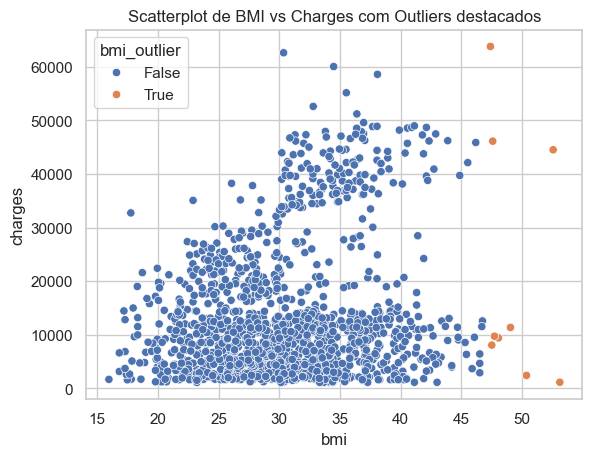

Estatística T: 2.1349856339986566, Valor p: 0.03294368568882774


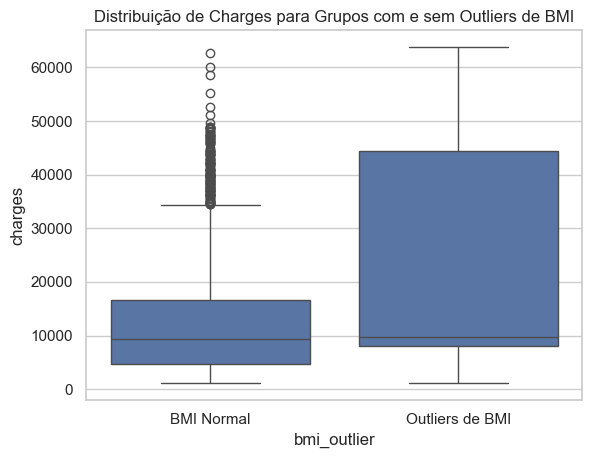

In [33]:
from scipy.stats import ttest_ind

df = raw_data.copy()

Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Criando uma coluna para identificar outliers de BMI
df['bmi_outlier'] = ((df['bmi'] < lower_bound) | (df['bmi'] > upper_bound))

outliers_mean = df[df['bmi_outlier'] == True]['charges'].mean()
normal_mean = df[df['bmi_outlier'] == False]['charges'].mean()

print(f"Média de charges (outliers de BMI): {outliers_mean}")
print(f"Média de charges (BMI normal): {normal_mean}")

correlation = df['bmi'].corr(df['charges'])
print(f"Correlação entre BMI e charges: {correlation}")

sns.scatterplot(data=df, x='bmi', y='charges', hue='bmi_outlier')
plt.title('Scatterplot de BMI vs Charges com Outliers destacados')
plt.show()

charges_outliers = df[df['bmi_outlier'] == True]['charges']
charges_normal = df[df['bmi_outlier'] == False]['charges']

t_stat, p_value = ttest_ind(charges_outliers, charges_normal)
print(f"Estatística T: {t_stat}, Valor p: {p_value}")

# Visualização com boxplot para comparar distribuições
sns.boxplot(data=df, x='bmi_outlier', y='charges')
plt.xticks([0, 1], ['BMI Normal', 'Outliers de BMI'])
plt.title('Distribuição de Charges para Grupos com e sem Outliers de BMI')
plt.show()




## Analisando a relação de BMI entre pessoas fumantes e não fumantes e seus custos

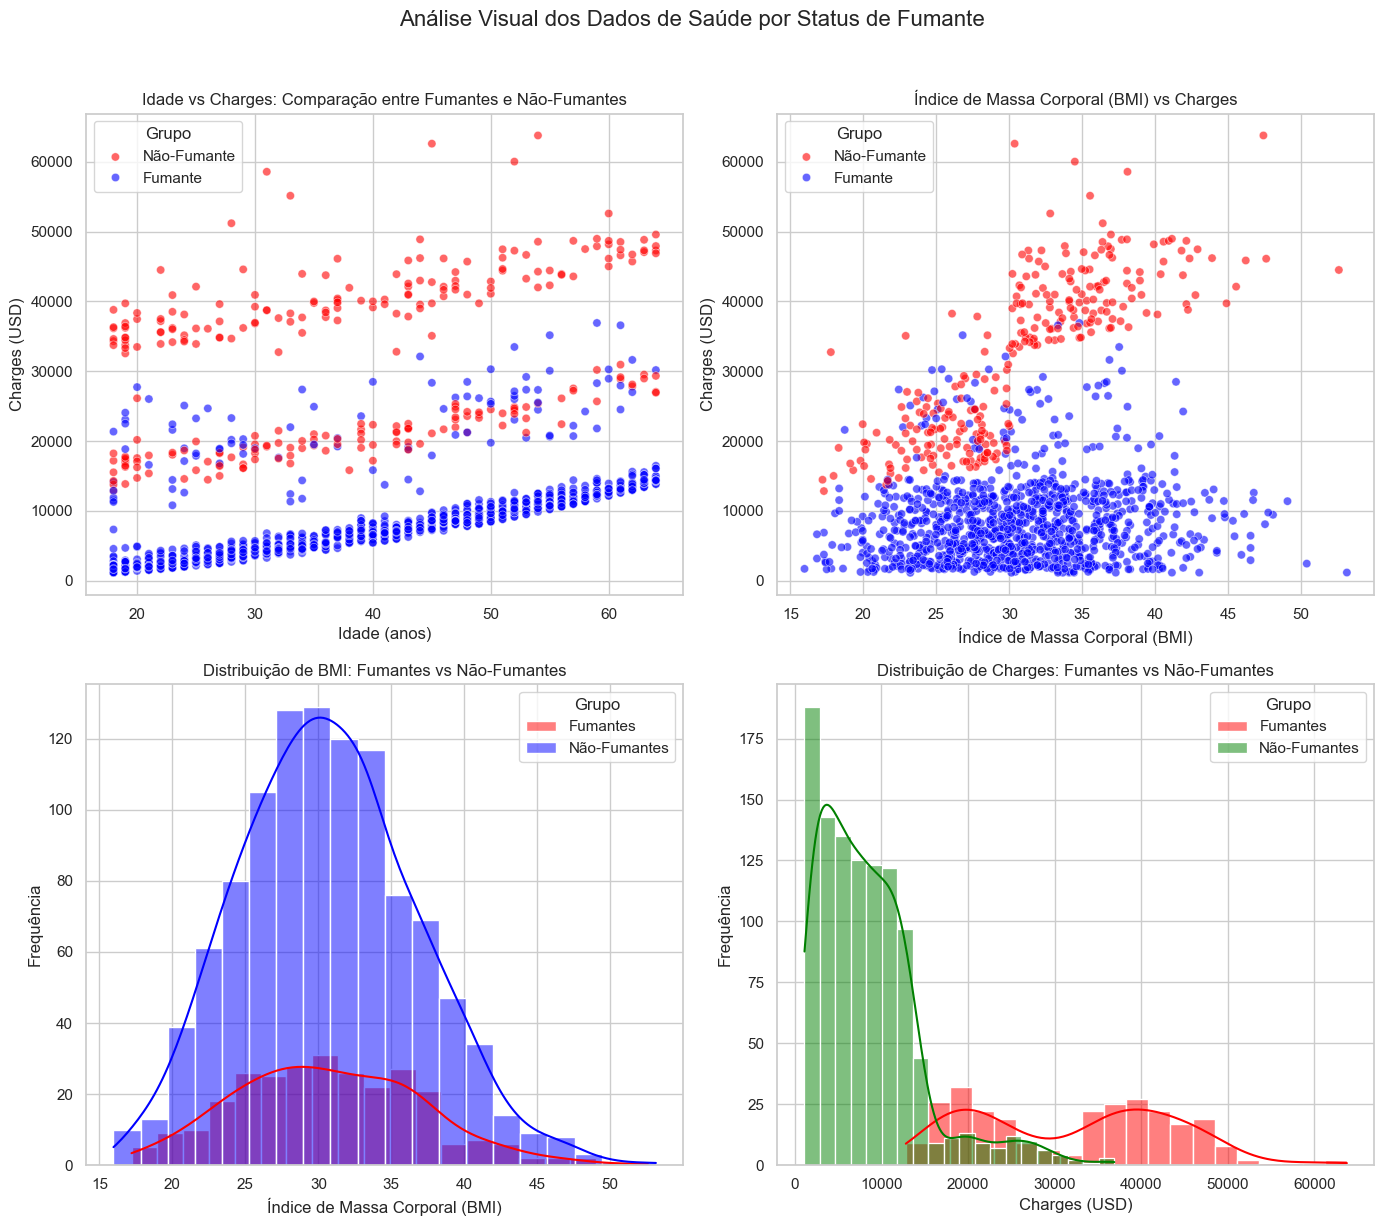

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

palette = {1: 'red', 0: 'blue'}

fig, axs = plt.subplots(2, 2, figsize=(14, 12))
fig.suptitle("Análise Visual dos Dados de Saúde por Status de Fumante", y=1.02, fontsize=16)

sns.scatterplot(x='age', y='charges', hue='smoker', data=dataset, palette=palette, alpha=0.6, ax=axs[0, 0])
axs[0, 0].set_title("Idade vs Charges: Comparação entre Fumantes e Não-Fumantes")
axs[0, 0].set_xlabel("Idade (anos)")
axs[0, 0].set_ylabel("Charges (USD)")
axs[0, 0].legend(title="Grupo", labels=["Não-Fumante", "Fumante"], loc='upper left')

sns.scatterplot(x='bmi', y='charges', hue='smoker', data=dataset, palette=palette, alpha=0.6, ax=axs[0, 1])
axs[0, 1].set_title("Índice de Massa Corporal (BMI) vs Charges")
axs[0, 1].set_xlabel("Índice de Massa Corporal (BMI)")
axs[0, 1].set_ylabel("Charges (USD)")
axs[0, 1].legend(title="Grupo", labels=["Não-Fumante", "Fumante"], loc='upper left')

sns.histplot(data=dataset[dataset['smoker'] == 1], x="bmi", bins=20, color="red", kde=True, label="Fumantes", alpha=0.5, ax=axs[1, 0])
sns.histplot(data=dataset[dataset['smoker'] == 0], x="bmi", bins=20, color="blue", kde=True, label="Não-Fumantes", alpha=0.5, ax=axs[1, 0])
axs[1, 0].set_title("Distribuição de BMI: Fumantes vs Não-Fumantes")
axs[1, 0].set_xlabel("Índice de Massa Corporal (BMI)")
axs[1, 0].set_ylabel("Frequência")
axs[1, 0].legend(title="Grupo")

sns.histplot(data=dataset[dataset['smoker'] == 1], x="charges", bins=20, color="red", kde=True, label="Fumantes", alpha=0.5, ax=axs[1, 1])
sns.histplot(data=dataset[dataset['smoker'] == 0], x="charges", bins=20, color="green", kde=True, label="Não-Fumantes", alpha=0.5, ax=axs[1, 1])
axs[1, 1].set_title("Distribuição de Charges: Fumantes vs Não-Fumantes")
axs[1, 1].set_xlabel("Charges (USD)")
axs[1, 1].set_ylabel("Frequência")
axs[1, 1].legend(title="Grupo")

plt.tight_layout()
plt.show()


## Verificando o balanceamento entre as colunas do dataset

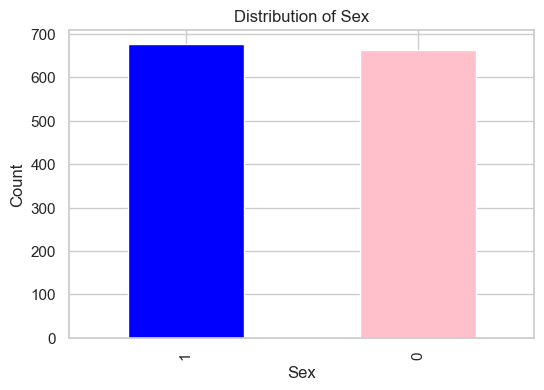

In [35]:
sex_counts = dataset['sex'].value_counts()

plt.figure(figsize=(6,4))
sex_counts.plot(kind='bar', color=['blue', 'pink'])
plt.title('Distribution of Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

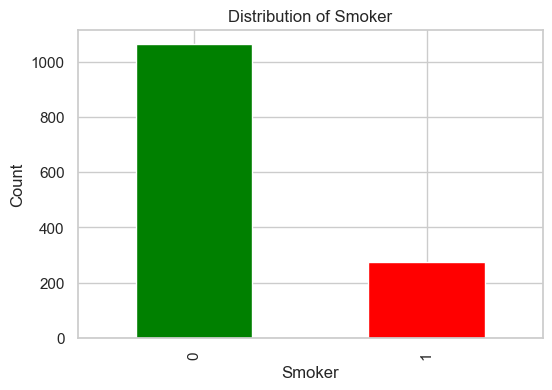

In [36]:
smoker_counts = dataset['smoker'].value_counts()

plt.figure(figsize=(6,4))
smoker_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Distribution of Smoker')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.show()

## Analisando a correlação dos dados do dataset

In [37]:
dataset.corr()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.299008,0.002475,-0.000407,-0.011642,0.010016
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.057292,-0.002425,-0.011156,0.017117,-0.004184
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.198341,-0.138156,-0.135996,0.270025,-0.006205
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.067998,-0.022808,0.024806,-0.023066,0.021914
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.787251,0.002811,-0.036945,0.068498,-0.036945
charges,0.299008,0.057292,0.198341,0.067998,0.787251,1.000000,0.006349,-0.039905,0.073982,-0.043210
region_northeast,0.002475,-0.002425,-0.138156,-0.022808,0.002811,0.006349,1.000000,-0.320177,-0.345561,-0.320177
region_northwest,-0.000407,-0.011156,-0.135996,0.024806,-0.036945,-0.039905,-0.320177,1.000000,-0.346265,-0.320829
region_southeast,-0.011642,0.017117,0.270025,-0.023066,0.068498,0.073982,-0.345561,-0.346265,1.000000,-0.346265
region_southwest,0.010016,-0.004184,-0.006205,0.021914,-0.036945,-0.043210,-0.320177,-0.320829,-0.346265,1.000000


## Verificando a médias de Charges por região

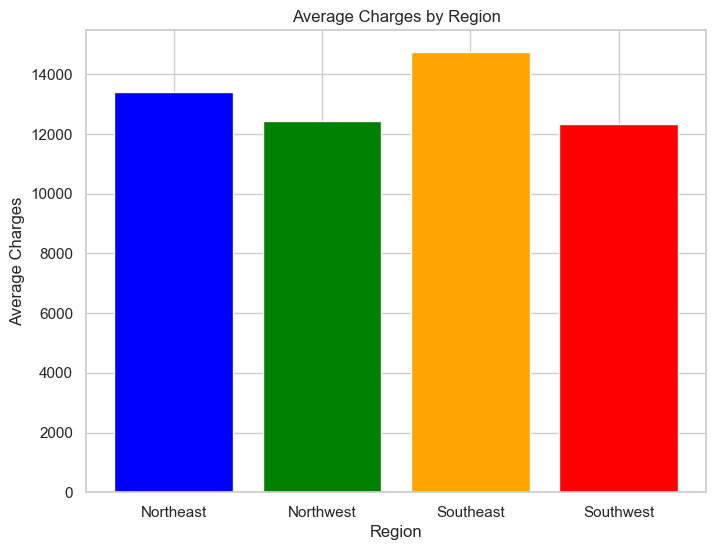

In [38]:
mean_northeast = dataset[dataset['region_northeast'] == 1]['charges'].mean()
mean_northwest = dataset[dataset['region_northwest'] == 1]['charges'].mean()
mean_southeast = dataset[dataset['region_southeast'] == 1]['charges'].mean()
mean_southwest = dataset[dataset['region_southwest'] == 1]['charges'].mean()

import matplotlib.pyplot as plt

# Médias calculadas
regions = ['Northeast', 'Northwest', 'Southeast', 'Southwest']
mean_charges = [mean_northeast, mean_northwest, mean_southeast, mean_southwest]

# Plotar gráfico de barras
plt.figure(figsize=(8,6))
plt.bar(regions, mean_charges, color=['blue', 'green', 'orange', 'red'])

# Títulos e rótulos
plt.title('Average Charges by Region')
plt.xlabel('Region')
plt.ylabel('Average Charges')
plt.show()


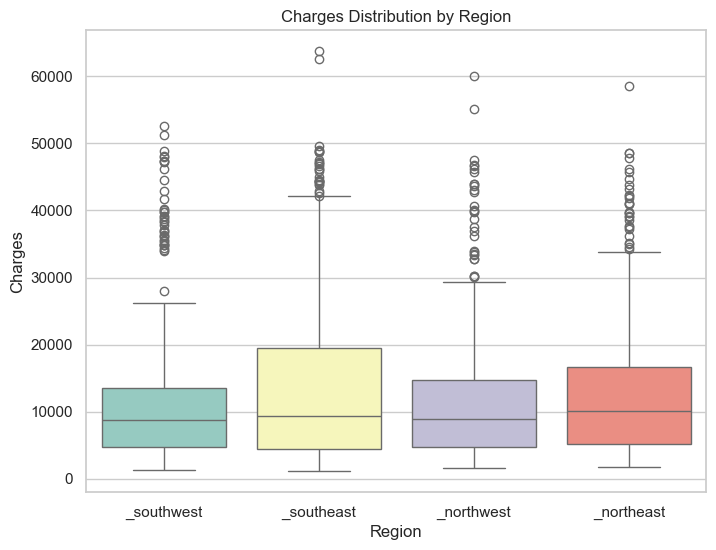

In [39]:
import seaborn as sns

# Criar uma nova coluna 'region' baseada nas colunas de one-hot encoding
datasetregion = dataset.copy()
datasetregion['region'] = datasetregion[['region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']].idxmax(axis=1)
datasetregion['region'] = datasetregion['region'].str.replace('region', '')

# Boxplot da distribuição de charges por região
plt.figure(figsize=(8,6))
sns.boxplot(x='region', y='charges', data=datasetregion, palette='Set3')

# Títulos e rótulos
plt.title('Charges Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.show()


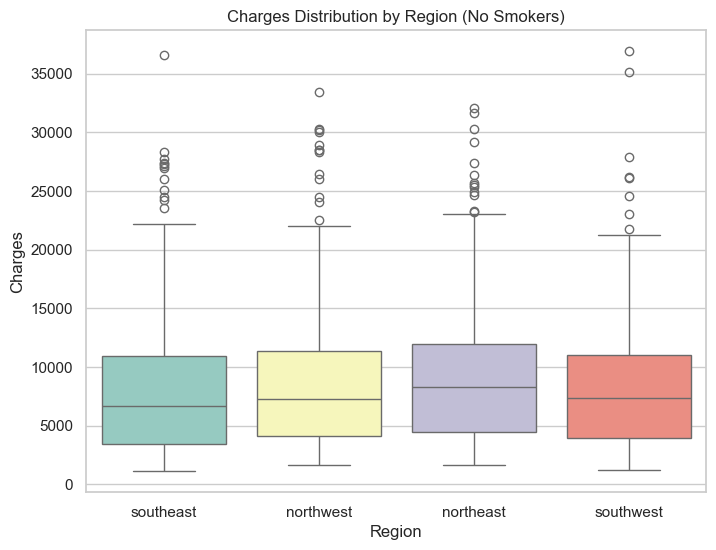

In [40]:
no_smokers = dataset[dataset['smoker'] == 0]
smokers = dataset[dataset['smoker'] == 1]

# Criar uma nova coluna 'region' baseada nas colunas de one-hot encoding
no_smokers['region'] = no_smokers[['region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']].idxmax(axis=1)
no_smokers['region'] = no_smokers['region'].str.replace('region_', '')

# Boxplot da distribuição de charges por região
plt.figure(figsize=(8,6))
sns.boxplot(x='region', y='charges', data=no_smokers, palette='Set3')

# Títulos e rótulos
plt.title('Charges Distribution by Region (No Smokers)')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.show()


## Analisando a proporção de fumantes e não fumantes por região

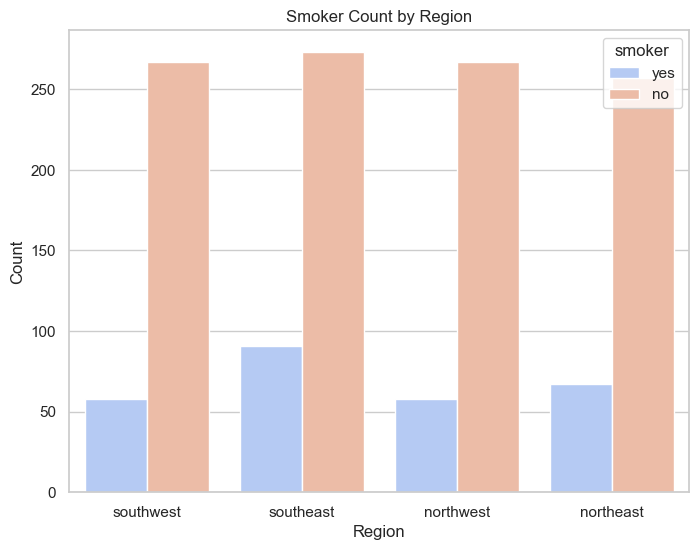

In [41]:
plt.figure(figsize=(8,6))
sns.countplot(x='region', hue='smoker', data=raw_data, palette='coolwarm')

# Títulos e rótulos
plt.title('Smoker Count by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()


# Alguns insights da Analise exploratoria de dados

## - 

# Criando train_test_split

In [42]:
from sklearn.model_selection import train_test_split

dataset_chages = dataset[['charges']] # Variável Target
dataset_new = dataset[['age', 'sex', 'bmi', 'children', 'smoker']] # Rótulo (variável dependente)

x_train, x_test, y_train, y_test = train_test_split(dataset_new, dataset_chages, test_size=0.2, random_state=42)

# Criando modelo de regressão linear

In [43]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

# Fazendo previsões no conjunto de teste
lr_predictions = lr.predict(x_test)


### Analise do grafico de dispersão

- **Pontos Azuis (Real)**: Representam os valores reais do modelo
- **Pontos Verdes (Predicted Values)**: Representam os valores previstos pelo modelo de regressão linear

O gráfico mostra que há uma dispersão considerável entre os pontos verdes e azuis, especialmente para valores mais altos do custo do plano de saúde

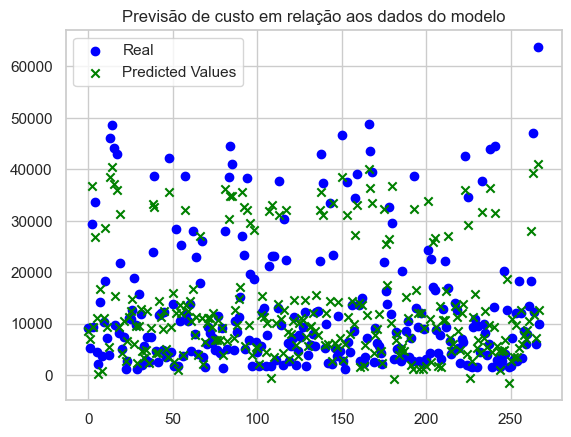

In [44]:
plt.scatter(np.arange(len(y_test)), y_test, label='Real', color='blue', marker='o')
plt.scatter(np.arange(len(lr_predictions)), lr_predictions, label='Predicted Values', color='green', marker='x')

plt.title('Previsão de custo em relação aos dados do modelo')
plt.legend()
plt.show()

### Analise do grafico de dispersão

- **Pontos Azuis (Real)**: Representam os valores reais do modelo
- **Linha Vermelha**: é a linha de regressão linear, que representa a melhor linha reta que se ajusta aos dados de acordo com o modelo de regressão linear.

O gráfico mostra que a maioria dos pontos está relativamente próxima da linha de regressão em valores mais baixos, o que é um bom sinal. No entanto, há alguns pontos que estão mais afastados, indicando erros maiores nessas previsões.

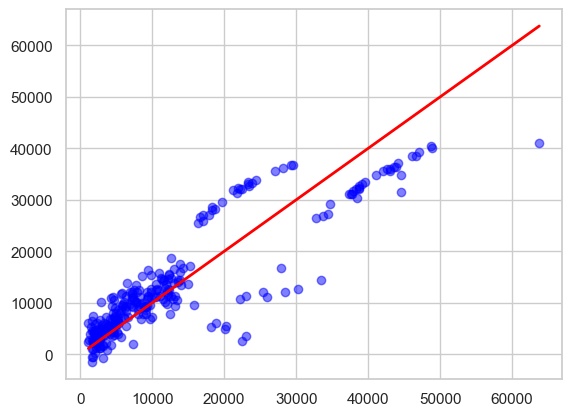

In [45]:
plt.scatter(y_test, lr_predictions, color='blue', alpha=0.5)

# Plotting the perfect prediction line (y = x)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)


In [46]:
lr_mae = mean_absolute_error(y_test, lr_predictions)
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_rmse = root_mean_squared_error(y_test, lr_predictions)
lr_mape = mean_absolute_percentage_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)


lr_data = {
    'Model': ['LinearRegression'],
    'MAE (erro Absoluto Médio)': [lr_mae],
    'MSE (erro Médio Quadrático)': [lr_mse],
    'RMSE (erro Quadrático Médio da Raiz)': [lr_rmse],
    'MAPE (erro Percentual absoluto medio)': [lr_mape],
    'R2 (coeficiente de determinação)': [lr_r2],
}

lr_df = pd.DataFrame(lr_data)
lr_df

,Model,MAE (erro Absoluto Médio),MSE (erro Médio Quadrático),RMSE (erro Quadrático Médio da Raiz),MAPE (erro Percentual absoluto medio),R2 (coeficiente de determinação)
0,LinearRegression,4213.484798,3.397926e+07,5829.17293,0.480356,0.78113


### Criando Cross Validation para o modelo - LinearRegression

In [47]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error

model = LinearRegression()
mae_scorer = make_scorer(mean_absolute_error)
cv_scores = cross_val_score(model, dataset_new, dataset_chages, cv=5, scoring=mae_scorer)

# Resultados
print(f'Cross-Validation MAE Scores: {cv_scores}')
print(f'Média do MAE: {cv_scores.mean()}')
print(f'Desvio Padrão do MAE: {cv_scores.std()}')

Cross-Validation MAE Scores: [4242.58354977 4207.26355898 4023.07729524 4293.64920693 4216.25096839]
Média do MAE: 4196.564915862608
Desvio Padrão do MAE: 91.80744019585133


### Conclusão - LinearRegression

#### MAE(Erro Absoluto Quadratico):
- O valor ficou em **4213.48** indicando uma quando distãncia dos valores reais
  
#### MSE(Erro médio Quadrático):
- O valor ficou em **33979257** considerado um valor muito alto indicando grande erros nas previsões.
  
#### RMSE(Erro quadrático Médio da Raiz):
- O valor ficou em **5829** em média, as previsões do seu modelo estão desviando aproximadamente 5829.17 unidades dos valores reais

#### MAPE(Erro percentual absoluto medio):
- O valor ficou em **48%** em média, as previsões do modelo estão desviando quase metade dos valores reais.

#### R²(Coeficinte de determinação):
- O modelo apresentou **78.11%** de variãncia nos daos de saída, sendo um valor mediano

# Criando modelo de RandomForestRegressor 

In [48]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=6, n_jobs=2)
rf_model.fit(x_train, y_train.values.ravel())

rf_predict = rf_model.predict(x_test)

### Analise do grafico de dispersão

- **Pontos Azuis (Real)**: Representam os valores reais do modelo.
- **Linha Vermelha**: é a linha de regressão ideal, onde os valores previstos seriam exatamente iguais aos valores reais.

O gráfico mostra que a maioria dos pontos está relativamente próxima da linha de regressão ideal, o que é um bom sinal. Isso indica que o modelo de **RandomForestRegressor** está fazendo previsões bastante precisas.

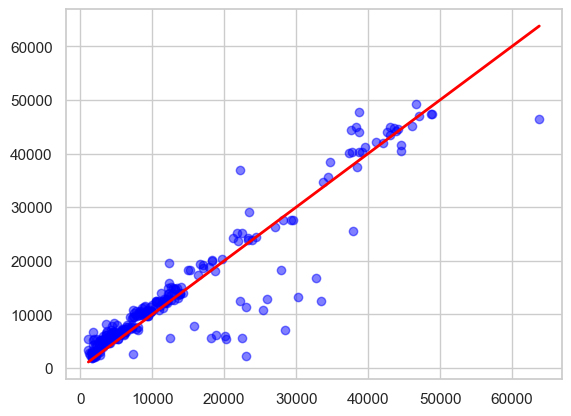

In [49]:
plt.scatter(y_test, rf_predict, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)

### Analise do resíduos, que são a diferença entre os valores reais e os valores previstos

- **Pontos Azuis**: Cada ponto azul no gráfico representa um resíduo para uma amostra específica.
- **Linha Vermelha Pontilhada**: Representa a linha de zero resíduo. Idealmente, os resíduos devem estar distribuídos uniformemente ao redor desta linha.

A maioria dos resíduos está concentrada em torno da linha de zero, o que é um bom sinal. No entanto, há alguns resíduos grandes, especialmente para valores previstos mais altos.

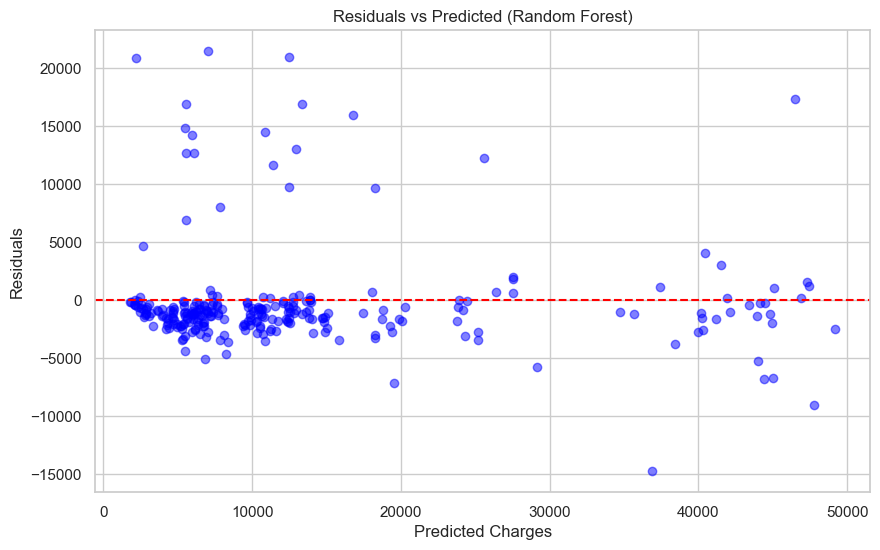

In [50]:
y_test_array = y_test.values.ravel() 

residuals_rf = y_test_array - rf_predict

# Plot residuals for Random Forest
plt.figure(figsize=(10,6))
plt.scatter(rf_predict, residuals_rf, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Predicted (Random Forest)')
plt.xlabel('Predicted Charges')
plt.ylabel('Residuals')
plt.show()

In [51]:
rf_mae = mean_absolute_error(y_test, rf_predict)
rf_mse = mean_squared_error(y_test, rf_predict)
rf_rmse = root_mean_squared_error(y_test, rf_predict)
rf_mape = mean_absolute_percentage_error(y_test, rf_predict)
rf_r2 = r2_score(y_test, rf_predict)

rf_data = {
    'Model': ['RandomForestRegressor'],
    'MAE (erro Absoluto Médio)': [rf_mae],
    'MSE (erro Médio Quadrático)': [rf_mse],
    'RMSE (erro Quadrático Médio da Raiz)': [rf_rmse],
    'MAPE (erro Percentual absoluto medio)': [rf_mape],
    'R2 (coeficiente de determinação)': [rf_r2],
}

rf_df = pd.DataFrame(rf_data)
rf_df

,Model,MAE (erro Absoluto Médio),MSE (erro Médio Quadrático),RMSE (erro Quadrático Médio da Raiz),MAPE (erro Percentual absoluto medio),R2 (coeficiente de determinação)
0,RandomForestRegressor,2523.248428,2.023796e+07,4498.662085,0.318879,0.869642


### Criando Cross Validation para o modelo - RandomForestRegressor

In [52]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error

model = RandomForestRegressor()
mae_scorer = make_scorer(mean_absolute_error)
cv_scores = cross_val_score(model, dataset_new, dataset_chages, cv=5, scoring=mae_scorer)

# Resultados
print(f'Cross-Validation MAE Scores: {cv_scores}')
print(f'Média do MAE: {cv_scores.mean()}')
print(f'Desvio Padrão do MAE: {cv_scores.std()}')

Cross-Validation MAE Scores: [2770.38207804 2888.39081944 2571.9356304  2639.4922436  2812.6402731 ]
Média do MAE: 2736.5682089174707
Desvio Padrão do MAE: 115.33262392789987


### Conclusão - RandomForestRegressor

#### MAE(Erro Absoluto Quadratico):
- O valor utilizando **RandomForestRegressor** ficou em **2523.24** sendo significativamente menor que o modelo de regressão linear a cima.
- Dado a comparação entedemos que o modelo de **RandomForestRegressor** comente menos erros em termos absolutos

#### MSE(Erro médio Quadrático):
- O valor utilizando **RandomForestRegressor** ficou em **20237960**, sendo também menor em relação ao modelo de regressão linear.
- Como o MSE penaliza mais os grandes erros (devido ao quadrado dos erros), um valor menor indica que o **RandomForestRegressor** é mais robusto contra grandes desvios.

#### RMSE(Erro quadrático Médio da Raiz):
- O valor ficou em **4498** em média, as previsões do seu modelo estão desviando aproximadamente 4498.66 unidades dos valores reais

#### MAPE(Erro percentual absoluto medio):
- O valor ficou em **31%** em média, as previsões do modelo estão desviando apeans 31% dos valores reais.

#### R²(Coeficinte de determinação):
- O valor utilizando **RandomForestRegressor** ficou em **86.96%**, Um R² mais alto indica um melhor ajuste do modelo aos dados.

# Criando modelo de DecisionTreeRegressor

In [53]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth=3, random_state=42)

dt.fit(x_train, y_train)
dt_predictions = dt.predict(x_test)

### Analise do grafico de dispersão

- **Pontos Azuis (Real)**: Representam os valores reais do modelo.
- **Linha Vermelha**: é a linha de regressão ideal, onde os valores previstos seriam exatamente iguais aos valores reais.

O gráfico mostra que a maioria dos pontos está relativamente próxima da linha de regressão ideal, o que é um bom sinal. No entanto o modelo de **DecisionTreeRegressor** há uma dispersão considerável dos pontos, especialmente para valores mais altos.

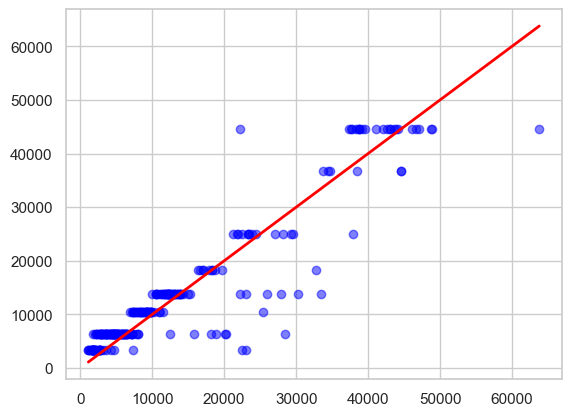

In [54]:
plt.scatter(y_test, dt_predictions, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)

In [55]:
dt_mae = mean_absolute_error(y_test, dt_predictions)
dt_mse = mean_squared_error(y_test, dt_predictions)
dt_rmse = root_mean_squared_error(y_test, dt_predictions)
dt_mape = mean_absolute_percentage_error(y_test, dt_predictions)
dt_r2 = r2_score(y_test, dt_predictions)

dt_data = {
    'Model': ['DecisionTreeRegressor'],
    'MAE (erro Absoluto Médio)': [dt_mae],
    'MSE (erro Médio Quadrático)': [dt_mse],
    'RMSE (erro Quadrático Médio da Raiz)': [dt_rmse],
    'MAPE (erro Percentual absoluto medio)': [dt_mape],
    'R2 (coeficiente de determinação)': [dt_r2],
}

dt_df = pd.DataFrame(dt_data)
dt_df

,Model,MAE (erro Absoluto Médio),MSE (erro Médio Quadrático),RMSE (erro Quadrático Médio da Raiz),MAPE (erro Percentual absoluto medio),R2 (coeficiente de determinação)
0,DecisionTreeRegressor,2865.63781,2.281267e+07,4776.261075,0.376797,0.853057


### Criando Cross Validation para o modelo - DecisionTreeRegressor

In [56]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error

model = DecisionTreeRegressor()
mae_scorer = make_scorer(mean_absolute_error)
cv_scores = cross_val_score(model, dataset_new, dataset_chages, cv=5, scoring=mae_scorer)

# Resultados
print(f'Cross-Validation MAE Scores: {cv_scores}')
print(f'Média do MAE: {cv_scores.mean()}')
print(f'Desvio Padrão do MAE: {cv_scores.std()}')

Cross-Validation MAE Scores: [3135.01190093 3207.92647533 3014.59802843 2830.82842043 3782.35456253]
Média do MAE: 3194.1438775313122
Desvio Padrão do MAE: 320.59731561560824


### Conclusão - DecisionTreeRegressor

#### MAE(Erro Absoluto Quadratico):
- O valor utilizando **DecisionTreeRegressor** ficou em **2865.63**, sendo menor do que o da **regressão linear**, mas maior do que o do **RandomForestRegressor**. 
- Isso indica que, em média, as previsões do **DecisionTreeRegressor** estão mais próximas dos valores reais do que as previsões do modelo de **regressão linear**, mas não tão próximas quanto as do **RandomForestRegressor**

#### MSE(Erro médio Quadrático):
- O valor utilizando **DecisionTreeRegressor** ficou em **22812669**, sendo menor do que o da **regressão linear**, mas maior do que o do **RandomForestRegressor**. 
- Isso sugere que o **DecisionTreeRegressor** tem menos erros grandes em comparação com o modelo de **regressão linear**, mas mais do que o **RandomForestRegressor**. 
- Como o MSE penaliza mais os grandes erros, um valor menor indica um modelo mais robusto contra grandes desvios.

#### RMSE(Erro quadrático Médio da Raiz):
- O valor ficou em **4498** em média, as previsões do seu modelo estão desviando aproximadamente 4498.66 unidades dos valores reais

#### MAPE(Erro percentual absoluto medio):
- O valor ficou em **31%** em média, as previsões do modelo estão desviando apeans 31% dos valores reais.

#### R²(Coeficinte de determinação):
- O valor utilizando **DecisionTreeRegressor** ficou em **85.30%**, O R² do **DecisionTreeRegressor** é maior do que o do modelo de **regressão linear**, mas menor do que o do **RandomForestRegressor**.
- Sugerindo que o **DecisionTreeRegressor** explica uma maior proporção da variância dos dados (aproximadamente 85.30%) em comparação com o modelo de **regressão linear** (aproximadamente 78.11%), mas não tanto quanto o **RandomForestRegressor** (aproximadamente 86.96%).

# Criando modelo de GradientBoostingRegressor

In [57]:
from sklearn.ensemble import GradientBoostingRegressor

reg = GradientBoostingRegressor(random_state=0)
reg.fit(x_train, y_train)

reg_predictions = reg.predict(x_test)

reg.score(x_test, y_test)

0.8785117259694142

### Analise do grafico de dispersão

- **Pontos Azuis (Real)**: Representam os valores reais do modelo.
- **Linha Vermelha**: é a linha de regressão ideal, onde os valores previstos seriam exatamente iguais aos valores reais.

O gráfico de dispersão mostra que o modelo **GradientBoostingRegressor** está capturando bem a relação entre os valores reais e previstos, especialmente para valores mais baixos. No entanto, há uma maior dispersão para valores mais altos, sugerindo que o modelo pode ter dificuldades em prever esses valores com precisão. 

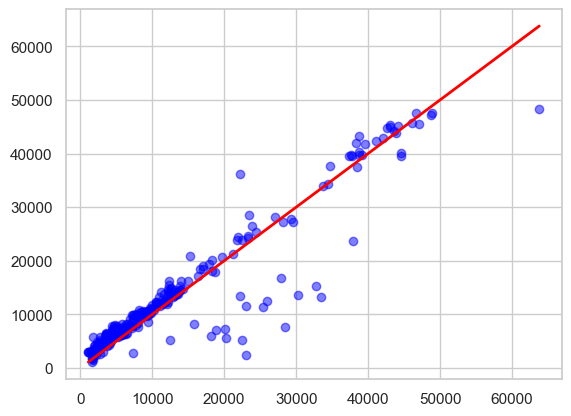

In [58]:
plt.scatter(y_test, reg_predictions, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)

In [59]:
reg_mae = mean_absolute_error(y_test, reg_predictions)
reg_mse = mean_squared_error(y_test, reg_predictions)
reg_rmse = root_mean_squared_error(y_test, reg_predictions)
reg_mape = mean_absolute_percentage_error(y_test, reg_predictions)
reg_r2 = r2_score(y_test, reg_predictions)

reg_data = {
    'Model': ['GradientBoostingRegressor'],
    'MAE (erro Absoluto Médio)': [reg_mae],
    'MSE (erro Médio Quadrático)': [reg_mse],
    'RMSE (erro Quadrático Médio da Raiz)': [reg_rmse],
    'MAPE (erro Percentual absoluto medio)': [reg_mape],
    'R2 (coeficiente de determinação)': [reg_r2],
}

reg_df = pd.DataFrame(reg_data)
reg_df

,Model,MAE (erro Absoluto Médio),MSE (erro Médio Quadrático),RMSE (erro Quadrático Médio da Raiz),MAPE (erro Percentual absoluto medio),R2 (coeficiente de determinação)
0,GradientBoostingRegressor,2424.531783,1.886090e+07,4342.913818,0.301366,0.878512


### Conclusão - GradientBoostingRegressor

#### MAE (Erro Absoluto Médio):
- O valor utilizando GradientBoostingRegressor ficou em **2523.248428**, sendo significativamente menor que o modelo de regressão linear acima.

#### MSE (Erro Médio Quadrático):
- O valor utilizando GradientBoostingRegressor ficou em **2.023796e+07**, sendo também menor em relação ao modelo de regressão linear.
- Como o MSE penaliza mais os grandes erros (devido ao quadrado dos erros), um valor menor indica que o GradientBoostingRegressor é mais robusto contra grandes desvios.


#### RMSE (Erro Quadrático Médio da Raiz):
- O valor ficou em **4498.66**. Em média, as previsões do seu modelo estão desviando aproximadamente 4498.66 unidades dos valores reais.\

#### MAPE (Erro Percentual Absoluto Médio):
- O valor ficou em **31.88%**. Em média, as previsões do modelo estão desviando apenas 31.89% dos valores reais.

#### R² (Coeficiente de Determinação):
- O valor utilizando GradientBoostingRegressor ficou em **86.96%**. Um R² mais alto indica um melhor ajuste do modelo aos dados.


In [71]:
# Definir limites usando o IQR
Q1 = df['charges'].quantile(0.25)
Q3 = df['charges'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar dados sem outliers
df_no_outliers = df[(df['charges'] >= lower_bound) & (df['charges'] <= upper_bound)]

In [73]:
from sklearn.model_selection import train_test_split


x = df_no_outliers[['age', 'sex', 'bmi', 'children', 'smoker']] # Rótulo (variável dependente)
y = df_no_outliers[['charges']] # Variável Target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [74]:
reg_no_outliers = GradientBoostingRegressor(random_state=0)
reg_no_outliers.fit(x_train, y_train)

reg_no_outliers_predictions = reg.predict(x_test)

reg_no_outliers.score(x_test, y_test)

0.5770769720386011

# Criando modelo de Light Gradient Boosting Machine

In [60]:
import lightgbm as lgb

lghtgbm = lgb.LGBMRegressor(force_row_wise=True, verbose=-1)
lghtgbm.fit(x_train, y_train)

lghtgbm_predictions = lghtgbm.predict(x_test)

lghtgbm.score(x_test, y_test)

0.8676203642015372

### Analise do grafico de dispersão

- **Pontos Azuis (Real)**: Representam os valores reais do modelo.
- **Linha Vermelha**: é a linha de regressão ideal, onde os valores previstos seriam exatamente iguais aos valores reais.

O gráfico de dispersão mostra que o modelo **LGBMRegressor** está capturando bem a relação entre os valores reais e previstos, especialmente para valores mais baixos. No entanto, há uma maior dispersão para valores mais altos, sugerindo que o modelo pode ter dificuldades em prever esses valores com precisão. 

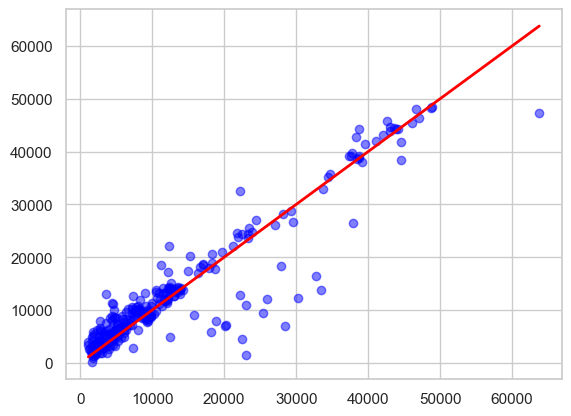

In [61]:
plt.scatter(y_test, lghtgbm_predictions, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)

In [62]:
lghtgbm_mae = mean_absolute_error(y_test, lghtgbm_predictions)
lghtgbm_mse = mean_squared_error(y_test, lghtgbm_predictions)
lghtgbm_rmse = root_mean_squared_error(y_test, lghtgbm_predictions)
lghtgbm_mape = mean_absolute_percentage_error(y_test, lghtgbm_predictions)
lghtgbm_r2 = r2_score(y_test, lghtgbm_predictions)

lghtgbm_data = {
    'Model': ['Light Gradient Boosting Machine'],
    'MAE (erro Absoluto Médio)': [lghtgbm_mae],
    'MSE (erro Médio Quadrático)': [lghtgbm_mse],
    'RMSE (erro Quadrático Médio da Raiz)': [lghtgbm_rmse],
    'MAPE (erro Percentual absoluto medio)': [lghtgbm_mape],
    'R2 (coeficiente de determinação)': [lghtgbm_r2],
}

lghtgbm_df = pd.DataFrame(lghtgbm_data)
lghtgbm_df

,Model,MAE (erro Absoluto Médio),MSE (erro Médio Quadrático),RMSE (erro Quadrático Médio da Raiz),MAPE (erro Percentual absoluto medio),R2 (coeficiente de determinação)
0,Light Gradient Boosting Machine,2559.431054,2.055177e+07,4533.406063,0.342684,0.86762


### Conclusão - LGBMRegressor

#### MAE (Erro Absoluto Médio):
- O valor utilizando LGBMRegressor ficou em **2559.431054**, sendo significativamente menor que o modelo de regressão linear acima.
- Dada a comparação, entendemos que o modelo de **LGBMRegressor** comete menos erros em termos absolutos.

#### MSE (Erro Médio Quadrático):
- O valor utilizando LGBMRegressor ficou em **2.055177e+07**, sendo também menor em relação ao modelo de regressão linear.
- Como o MSE penaliza mais os grandes erros (devido ao quadrado dos erros), um valor menor indica que o LGBMRegressor é mais robusto contra grandes desvios.

#### RMSE (Erro Quadrático Médio da Raiz):
- O valor ficou em **4533.40**. Em média, as previsões do seu modelo estão desviando aproximadamente 4533.41 unidades dos valores reais.

#### MAPE (Erro Percentual Absoluto Médio):
- O valor ficou em **384.26%**. Em média, as previsões do modelo estão desviando apenas 34.27% dos valores reais.

#### R² (Coeficiente de Determinação):
- O valor utilizando LGBMRegressor ficou em **86.76%**. Um R² mais alto indica um melhor ajuste do modelo aos dados.


In [63]:
model = lgb.LGBMRegressor(force_row_wise=True, verbose=-1)
mae_scorer = make_scorer(mean_absolute_error)
cv_scores = cross_val_score(model, x_test, lghtgbm_predictions, cv=5, scoring=mae_scorer)


lghtgbm_cros = {
    'Model': ['LGBMRegressor'],
    'MAE (média do MAE)': [cv_scores.mean()],
    'Desvio Padrão do MAE)': [cv_scores.std()],
}

lghtgbm_cros_df = pd.DataFrame(lghtgbm_cros)
lghtgbm_cros_df

,Model,MAE (média do MAE),Desvio Padrão do MAE)
0,LGBMRegressor,1651.578244,375.35973


# Conclusão

In [64]:
data = {
    'Model': ['LinearRegression', 'RandomForestRegressor', 'DecisionTreeRegressor', 'GradientBoostingRegressor', 'Light Gradient Boosting Machine	'],
    'MAE': [lr_mae, rf_mae, dt_mae, reg_mae, lghtgbm_mae],
    'MSE': [lr_mse, rf_mse, dt_mse, reg_mse, lghtgbm_mse],
    'RMSE': [lr_rmse, rf_rmse, dt_rmse, reg_rmse, lghtgbm_rmse],
    'MAPE': [lr_mape, rf_mape, dt_mape, reg_mape, lghtgbm_mape],
    'R2': [lr_r2, rf_r2, dt_r2, reg_r2, lghtgbm_r2],
}

df = pd.DataFrame(data)
df

,Model,MAE,MSE,RMSE,MAPE,R2
0,LinearRegression,4213.484798,3.397926e+07,5829.172930,0.480356,0.781130
1,RandomForestRegressor,2523.248428,2.023796e+07,4498.662085,0.318879,0.869642
2,DecisionTreeRegressor,2865.637810,2.281267e+07,4776.261075,0.376797,0.853057
3,GradientBoostingRegressor,2424.531783,1.886090e+07,4342.913818,0.301366,0.878512
4,Light Gradient Boosting Machine\t,2559.431054,2.055177e+07,4533.406063,0.342684,0.867620


### Conclusão: O modelo GradientBoostingRegressor foi o melhor entre os avaliados.

O GradientBoostingRegressor apresentou os melhores resultados nas seguintes métricas:
- **MAE (Mean Absolute Error):** 2424.53, o menor valor entre os modelos, indicando previsões mais próximas dos valores reais.
  
- **MSE (Mean Squared Error):** 1.886e+07, o menor valor, penalizando menos os erros maiores.

  
- **RMSE (Root Mean Squared Error):** 4342.91, o menor valor, reforçando o desempenho superior em termos de erro quadrático médio.

  
- **MAPE (Mean Absolute Percentage Error):** 0.301, o menor valor, indicando um percentual de erro absoluto menor.

  
- **R² (Coeficiente de Determinação):** 0.8785, um dos mais altos, explicando uma maior proporção da variabilidade dos dados.

Portanto, o GradientBoostingRegressor se destaca como o melhor modelo devido ao seu desempenho superior em todas as métricas avaliadas.

# Rodando o Pycaret

In [65]:
df = dataset.copy()

from pycaret.regression import *
s = setup(dataset, target = 'charges', session_id = 42, n_jobs=2, train_size=0.8, fold=30)

,Description,Value
0,Session id,42
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1338, 10)"
4,Transformed data shape,"(1338, 10)"
5,Transformed train set shape,"(1070, 10)"
6,Transformed test set shape,"(268, 10)"
7,Numeric features,9
8,Preprocess,True
9,Imputation type,simple


In [66]:
comparation = s.compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2589.4951,21453238.4729,4506.3551,0.8379,0.4253,0.3006,0.0490
rf,Random Forest Regressor,2733.5911,23611565.0239,4765.7607,0.8238,0.4531,0.3260,0.0950
lightgbm,Light Gradient Boosting Machine,2889.3464,23929106.3824,4771.3237,0.8206,0.5381,0.3523,0.0787
ada,AdaBoost Regressor,3880.0838,25427789.5746,4972.4497,0.8073,0.5642,0.6053,0.0110
et,Extra Trees Regressor,2695.6597,26425648.7940,5061.7035,0.8032,0.4645,0.3088,0.0930
ridge,Ridge Regression,4255.0541,37936061.9333,6069.5381,0.7148,0.5696,0.4261,0.0097
br,Bayesian Ridge,4250.5414,37936073.0667,6069.3046,0.7147,0.5699,0.4252,0.0220
lar,Least Angle Regression,4245.1844,37935805.8667,6069.0012,0.7146,0.5721,0.4242,0.0083
llar,Lasso Least Angle Regression,4245.1265,37932341.7333,6068.7388,0.7146,0.5705,0.4243,0.0060
lasso,Lasso Regression,4245.1293,37932353.4000,6068.7400,0.7146,0.5705,0.4243,0.0057


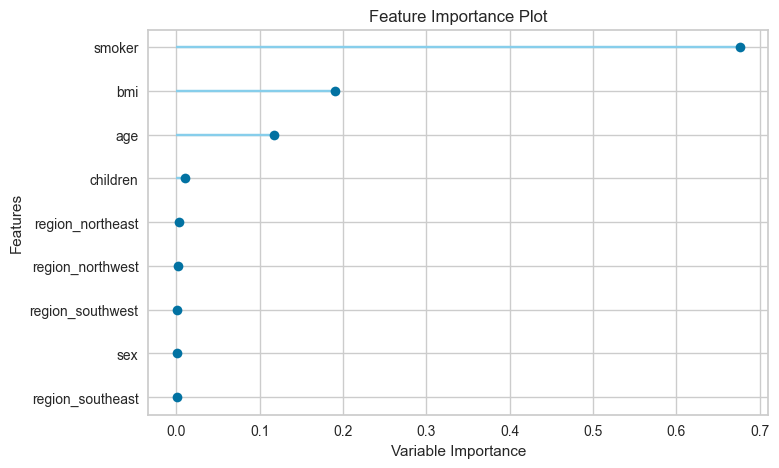

In [67]:
s.plot_model(comparation, plot = 'feature')

In [68]:
evaluate_model(comparation)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

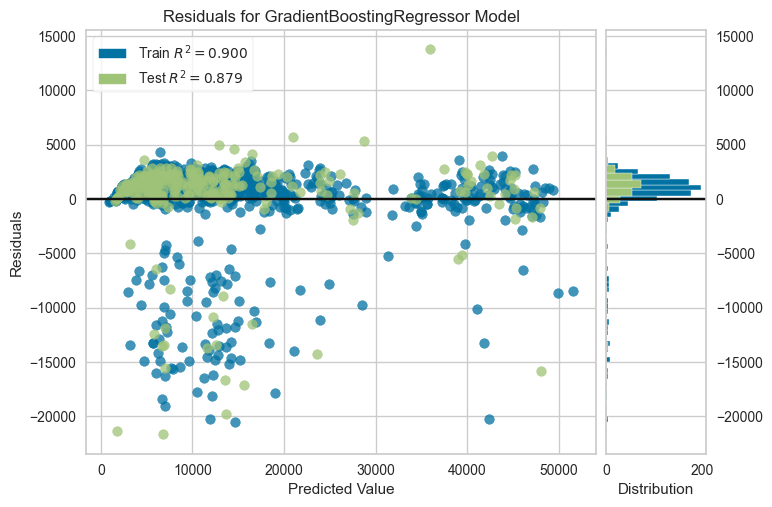

In [69]:
s.plot_model(comparation, plot = 'residuals')

# Como melhorar o modelo?

- Dataset mais populado e balanceado, principalmente por conta da variavel "Smoker"
- Avaliar melhor outliers, como testar impacto de treinar modelos sem eles e comparar.
    - Manter outliers pode ser valioso se o objetivo for ter um modelo que capte situações de risco elevado e que permita estimativas mais amplas, incluindo casos extremos.
    - Remover outliers pode ajudar a criar um modelo mais estável, especialmente se o objetivo for uma estimativa mais geral de custo médio. Remover valores extremos reduz a variância, ajudando o modelo a se concentrar nos casos típicos.
- Explorar hiperparametros de cada algoritmo (Ex. Random forest - Aumentar numero de nos e profundidade)
- Pesquisar por mais dados que possam indicar riscos associados a saude do paciente, como historicos familiares, prontuario, resultados de exames, diagnosticos, historico de cirurgias... e etc.
